### 1. Configuração do Ambiente

In [1]:
#!pip install "cognite-sdk[pandas]" matplotlib seaborn tensorflow plotly -q

import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import acf
from tsdiffusion_transformed.dataloader import DataLoader
import json
#import tensorflow as tf
#from tensorflow import keras

print("Bibliotecas importadas com sucesso!")

Updated: UnsupervisedStateSegmenter now supports multi-channel (multivariate) series.

Bibliotecas importadas com sucesso!


/home/ferna/fe/lib/python3.12/site-packages/ipykernel/ipkernel.py:772: UserWarning: You are using version='7.83.1' of the SDK, however version='7.88.0' is available. To suppress this warning, either upgrade or do the following:
>>> from cognite.client.config import global_config
>>> global_config.disable_pypi_version_check = True
  _threading_Thread_run(self)


In [2]:
import debugpy
debugpy.listen(('0.0.0.0', 5678))

('0.0.0.0', 5678)

### 2. Ativar o DataLoader

In [3]:
import importlib
import sys
importlib.reload(sys.modules['tsdiffusion_transformed.dataloader'])
from tsdiffusion_transformed.dataloader import DataLoader
dl = DataLoader()
dl.add_segments(segments=6, window=40, step=40, series=[
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActShaft Power',
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActPress Ratio'  
], path="segmenter_model.pkl")
#dl.segmenter.save("segmenter_model.pkl")


CogniteAuthError: Error generating access token: invalid_client, 401, AADSTS7000222: The provided client secret keys for app '1b90ede3-271e-401b-81a0-a4d52bea3273' are expired. Visit the Azure portal to create new keys for your app: https://aka.ms/NewClientSecret, or consider using certificate credentials for added security: https://aka.ms/certCreds. Trace ID: 47bb566a-9fb8-4f1a-9c91-780f2bc04901 Correlation ID: 1f7930a8-54b7-4cde-b4fd-154413a7c75a Timestamp: 2025-11-02 13:07:34Z

### 5. Análise de Séries Temporais

### 6. Análise Exploratória dos Dados (EDA)

Com os dados coletados e as colunas renomeadas, podemos realizar uma análise mais clara e informativa.

#### 6.1. Informações e Estatísticas Descritivas

In [8]:
df_data_descriptive = dl.df
if not df_data_descriptive.empty:
    print("Informações Gerais do DataFrame:")
    df_data_descriptive.info()

    print("\n\nEstatísticas Descritivas:")
    display(df_data_descriptive.describe())
else:
    print("DataFrame de dados está vazio.")

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269820 entries, 2019-09-01 03:00:16 to 2019-12-01 02:50:14
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   PH (CBM) 1st Stage ExpPress Ratio     257236 non-null  float64
 1   PH (CBM) 1st Stage Poly Head Dev      257234 non-null  float64
 2   PH (CBM) 1st Stage ActShaft Power     257217 non-null  float64
 3   PH (CBM) 1st Stage Press Rat Dev      257241 non-null  float64
 4   PH (CBM) 1st Stg ActCompr Poly Head   257198 non-null  float64
 5   PH (CBM) 1st Stage Shft Pwr Dev       257243 non-null  float64
 6   PH (CBM) 1st Stage ActCompr Poly Eff  257197 non-null  float64
 7   PH (CBM) 1st Stage ExpCompr Poly Eff  257204 non-null  float64
 8   PH (CBM) 1st Stage ExpShaft Power     257233 non-null  float64
 9   PH (CBM) 1st Stage ActPress Ratio     257042 non-null  float64
 10  P

,PH (CBM) 1st Stage ExpPress Ratio,PH (CBM) 1st Stage Poly Head Dev,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stage Press Rat Dev,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage Shft Pwr Dev,PH (CBM) 1st Stage ActCompr Poly Eff,PH (CBM) 1st Stage ExpCompr Poly Eff,PH (CBM) 1st Stage ExpShaft Power,PH (CBM) 1st Stage ActPress Ratio,PH (CBM) 1st Stg ExpCompr Poly Head,states
count,257236.000000,257234.000000,257217.000000,257241.000000,257198.000000,257243.000000,257197.000000,257204.000000,257233.000000,257042.000000,257239.000000,269820.000000
mean,3.076321,14.520072,9104.724934,18.470475,164.708684,9.840052,83.518144,80.171849,8290.874086,3.633770,144.266681,1.157438
std,0.179574,7.287152,464.141791,7.521123,5.609945,3.985229,12.106525,2.568198,357.946971,0.128819,8.456709,1.460363
min,0.000000,-50.689212,-494.728680,-37.411146,0.000000,-104.442267,-742.348504,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.995687,9.168727,8870.917240,12.918845,163.009551,6.998561,82.141817,80.335649,8125.595928,3.589595,140.684675,0.000000
50%,3.110285,13.411708,9086.903071,17.638007,164.896699,9.219195,83.467303,80.667875,8276.874545,3.639628,145.988064,0.000000
75%,3.196062,18.339255,9319.753052,22.726350,166.831298,12.245489,84.896767,80.806427,8443.375967,3.687220,149.842411,3.000000
max,3.438750,98.038000,13490.593928,89.471926,176.638488,34.117310,5879.049525,80.873058,11967.419481,3.957146,159.482564,3.000000


#### 6.2. Visualização dos Dados

**a) Gráfico das Séries Temporais**

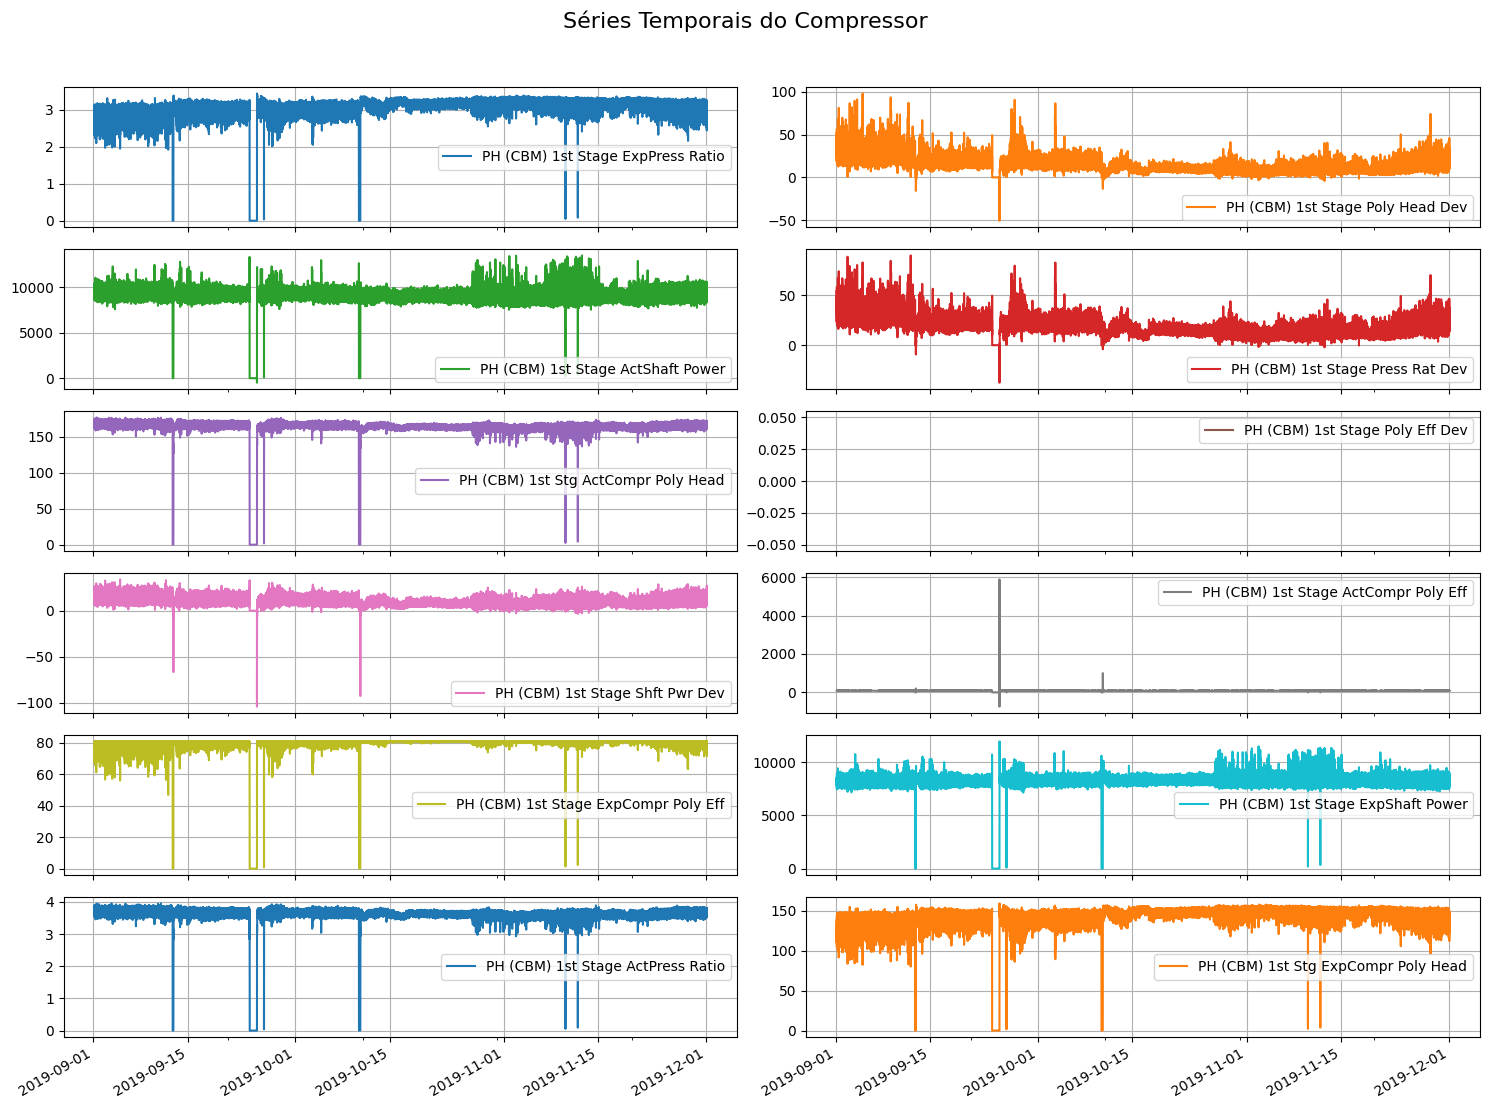

In [29]:
if not df_data_descriptive.empty:
    # Interpola valores nulos para melhor visualização
    df_plot = df_data_descriptive.interpolate()
    df_plot.plot(figsize=(15, 12), subplots=True, layout=(-1, 2), sharex=True, grid=True)
    plt.suptitle("Séries Temporais do Compressor", y=0.92, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.9]) # Ajuste de layout para evitar sobreposição do título
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**b) Distribuição das Variáveis (Histogramas)**

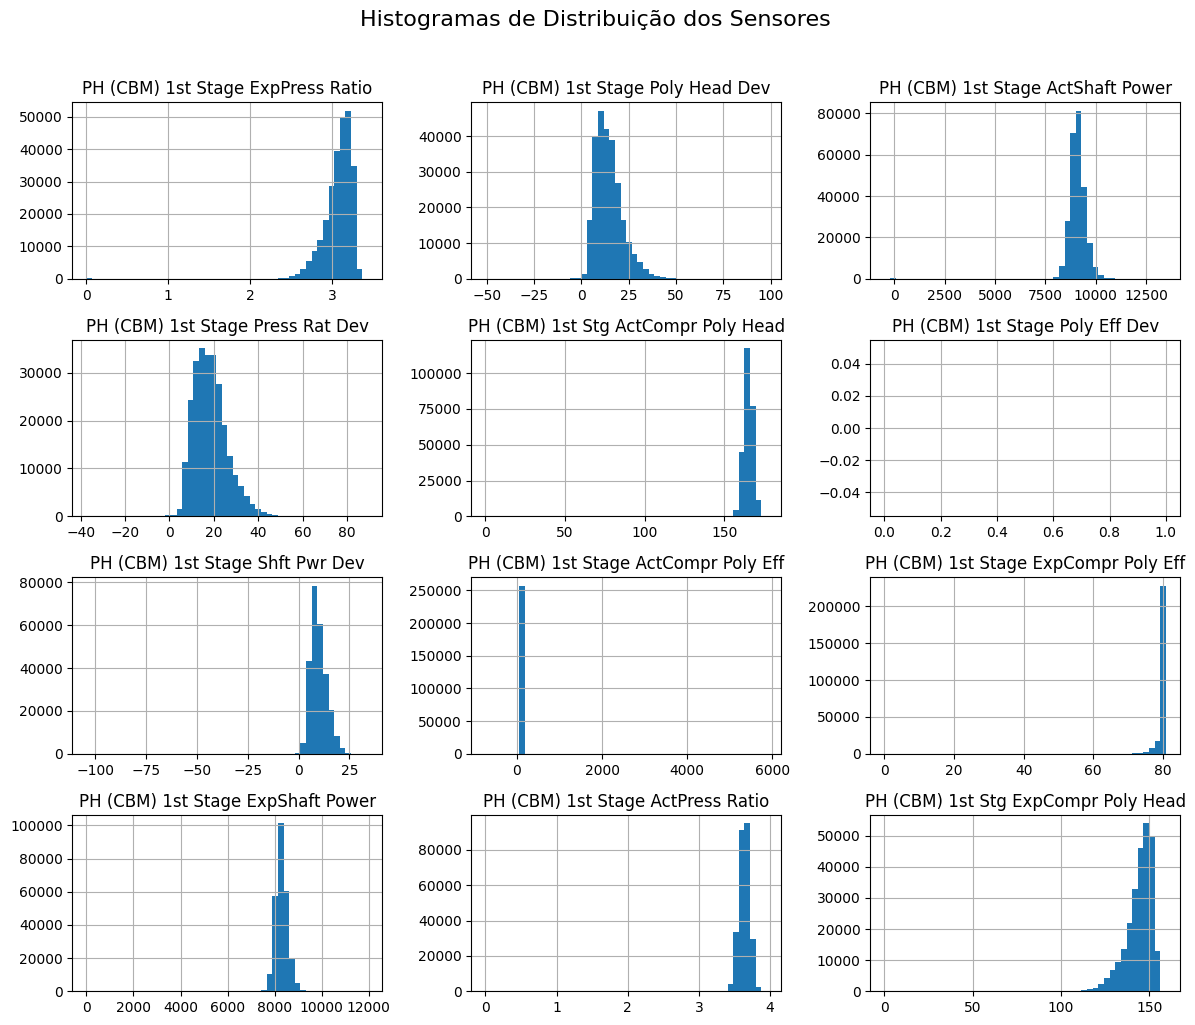

In [30]:
if not df_data_descriptive.empty:
    df_data_descriptive.hist(figsize=(12, 10), bins=50, layout=(-1, 3), sharex=False, sharey=False)
    plt.suptitle("Histogramas de Distribuição dos Sensores", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**c) Matriz de Correlação**

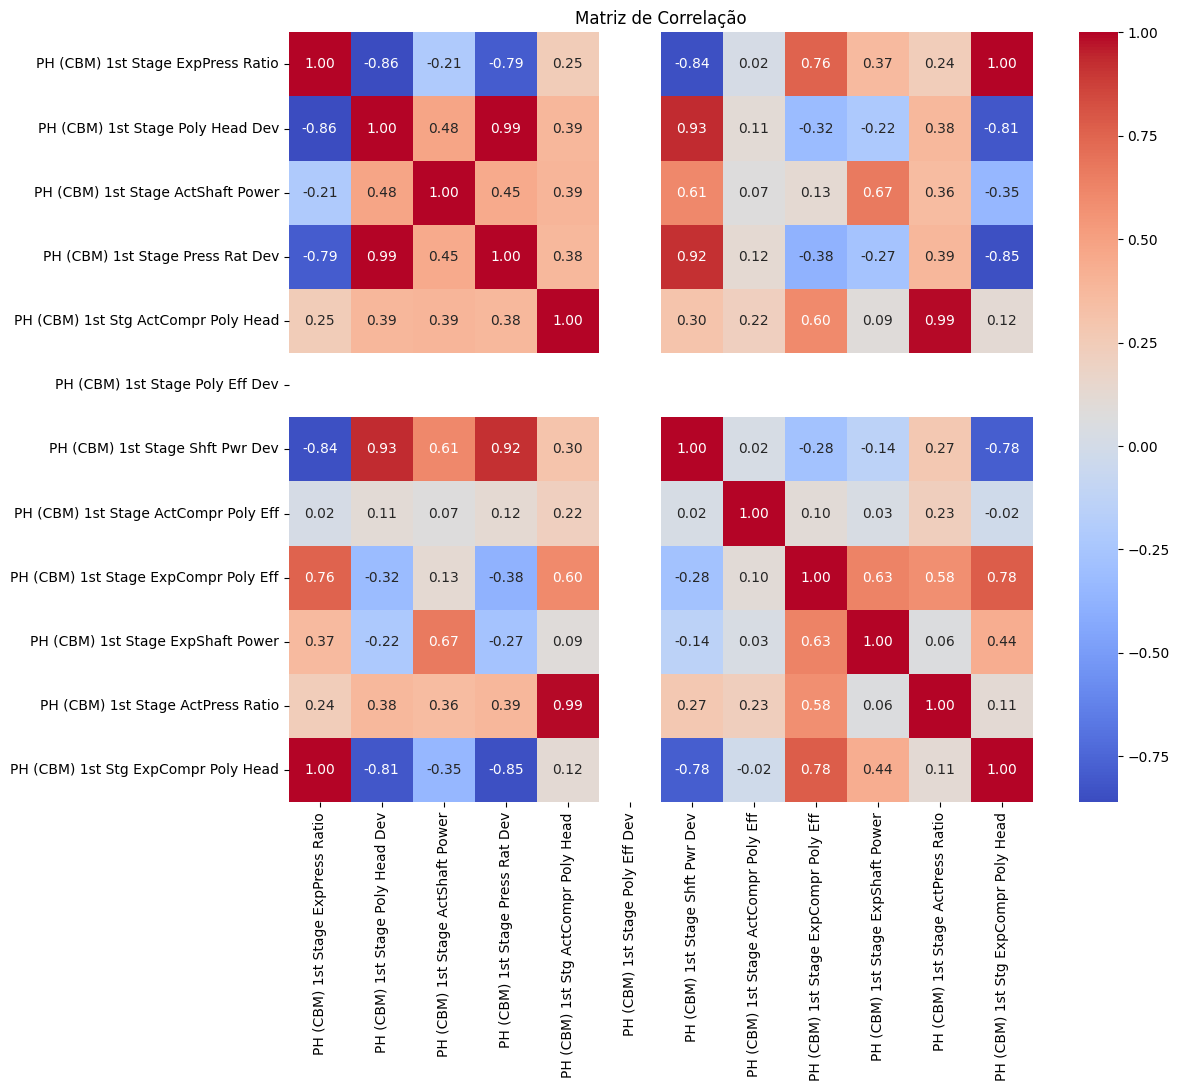

In [31]:
if not df_data_descriptive.empty:
    # Renomeia colunas para serem mais curtas para o gráfico de correlação
    correlation_df = df_data.rename(columns=lambda c: c.replace('PH (CBM)', '').replace(':VALUE', ''))
    # Usamos os nomes descritivos para a matriz de correlação
    correlation_matrix = df_data_descriptive.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("DataFrame de dados está vazio.")

#### 6.3. Análise Exploratória Adicional (Gemini)

Para aprofundar a análise, técnicas adicionais foram incluídas pelo Gemini para entender a distribuição dos dados e suas tendências temporais.

* **Box Plots:** Ajudam a identificar a dispersão, a mediana e os outliers em cada sensor, oferecendo uma visão clara da variabilidade.
* **Estatísticas Móveis:** O cálculo da média e do desvio padrão em janelas de tempo deslizantes revela tendências e mudanças na volatilidade dos sinais, que são difíceis de perceber em gráficos estáticos.
* **Gráficos Interativos:** Permitem uma exploração mais detalhada e flexível dos dados, com zoom e informações pontuais.

**d) Box Plots para Distribuição e Outliers**

In [ ]:
if not df_data_descriptive.empty:
    # Usa o dataframe com nomes descritivos
    df_melt = df_data_descriptive.drop(columns=['PH (CBM) 1st Stage Poly Eff Dev']).melt() # Remove a coluna vazia

    fig = px.box(df_melt, x='variable', y='value', color='variable',
                 title="Distribuição e Outliers por Sensor")
    fig.update_xaxes(title_text="Sensor")
    fig.update_yaxes(title_text="Valor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

**e) Análise de Tendências com Estatísticas Móveis**

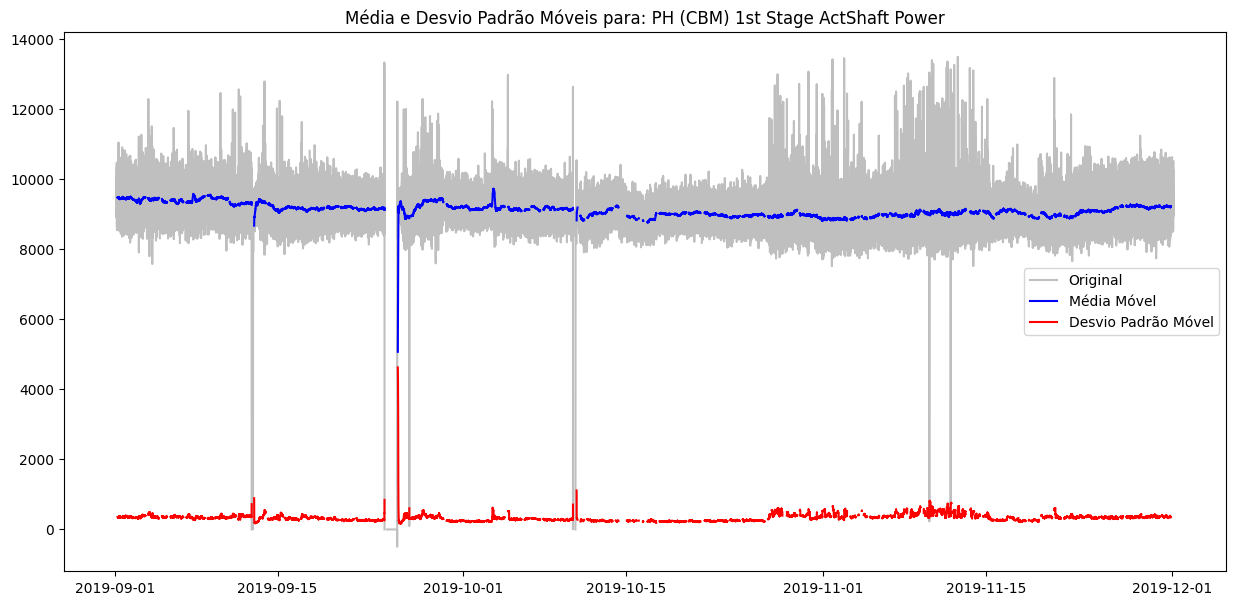

In [33]:
power_sensor = 'PH (CBM) 1st Stage ActShaft Power' # Usando o nome descritivo
if power_sensor in df_data_descriptive.columns:
    window = 288 # Janela de 1 dia (288 pontos de 5min)

    rolling_mean = df_data_descriptive[power_sensor].rolling(window=window).mean()
    rolling_std = df_data_descriptive[power_sensor].rolling(window=window).std()

    plt.figure(figsize=(15, 7))
    plt.title(f'Média e Desvio Padrão Móveis para: {power_sensor}')
    plt.plot(df_data_descriptive.index, df_data_descriptive[power_sensor], label='Original', color='gray', alpha=0.5)
    plt.plot(rolling_mean, label='Média Móvel', color='blue')
    plt.plot(rolling_std, label='Desvio Padrão Móvel', color='red')
    plt.legend()
    plt.show()
else:
    print(f"A coluna '{power_sensor}' não foi encontrada.")

**f) Gráfico Interativo das Séries Temporais**

In [ ]:
if not df_data_descriptive.empty:
    fig = px.line(df_data_descriptive.interpolate(), title='Séries Temporais Interativas do Compressor')
    fig.update_xaxes(title_text="Data e Hora")
    fig.update_yaxes(title_text="Valor do Sensor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

---

### 8. Análise de janela ideal

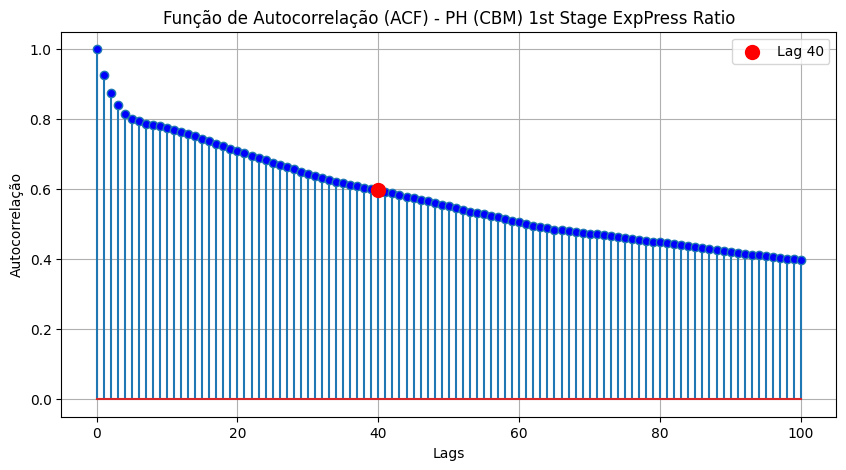

In [16]:
df = df_data_descriptive.copy()
df.bfill(inplace=True)
df.ffill(inplace=True)
acf_values = acf(df['PH (CBM) 1st Stage ActPress Ratio'], nlags=100, fft=True)
lags = np.arange(len(acf_values))

plt.figure(figsize=(10, 5))
markerline, stemlines, baseline = plt.stem(lags, acf_values)
plt.setp(markerline, 'markerfacecolor', 'blue')  # cor padrão

# Destacar lag=30
plt.scatter(40, acf_values[40], color='red', s=100, zorder=3, label='Lag 40')

plt.title('Função de Autocorrelação (ACF) - PH (CBM) 1st Stage ExpPress Ratio')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid()
plt.legend()
plt.show()
 

In [14]:
acf_values

array([1.        , 0.92501796, 0.87452033, 0.84156798, 0.81413884,
       0.80082331, 0.79424166, 0.787741  , 0.78316597, 0.77941528,
       0.77431126, 0.76969723, 0.76444052, 0.75768771, 0.75074146,
       0.74391665, 0.73667186, 0.73017634, 0.72305676, 0.71603248,
       0.70930206, 0.70217579, 0.69571386, 0.68918295, 0.68250459,
       0.67575312, 0.6691628 , 0.66302265, 0.65657892, 0.65030804,
       0.64418586, 0.63797706, 0.63211807, 0.62598373, 0.62060192,
       0.61640144, 0.61255359, 0.60858318, 0.60470919, 0.60101575,
       0.59687159, 0.59288386, 0.58874554, 0.58375851, 0.57902712,
       0.57397055, 0.56955655, 0.56534887, 0.56108574, 0.55627669,
       0.55080334, 0.54542199, 0.54063974, 0.53617446, 0.53198362,
       0.52793933, 0.52369015, 0.51942601, 0.51484929, 0.51033945,
       0.50552684, 0.50009935, 0.49514914, 0.49166806, 0.48812999,
       0.48479502, 0.48228219, 0.47995272, 0.47765965, 0.4752904 ,
       0.47310964, 0.47079025, 0.46821857, 0.46551039, 0.46283

### 9.1 6 estados

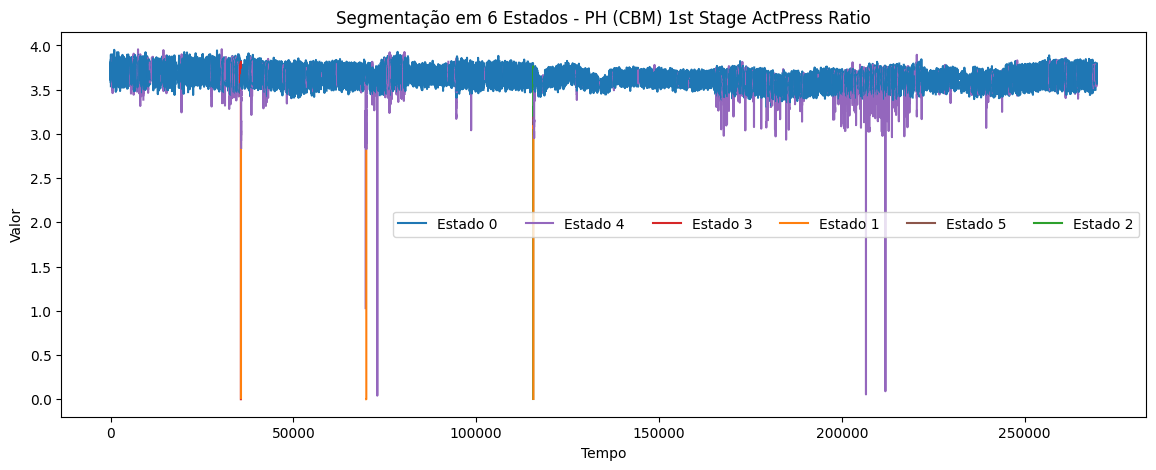

In [22]:
series = np.asarray(dl.df['PH (CBM) 1st Stage ActPress Ratio'])  # sua série original
idx = dl.pred["window_indices"]  # lista de (start, end) das janelas
states = dl.pred["states_per_window"]       # estado por janela
k = len(np.unique(states))   # número de estados únicos

plt.figure(figsize=(14, 5))

for (start, end), state in zip(idx, states):
    plt.plot(
        range(start, end),
        series[start:end],
        label=f"Estado {state}",
        color=plt.cm.tab10(state % 10)  # cores automáticas
    )

plt.title("Segmentação em 6 Estados - PH (CBM) 1st Stage ActPress Ratio")
plt.xlabel("Tempo")
plt.ylabel("Valor")
# legenda compacta sem duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=k)
plt.show()

### 10 Pós-processamento

In [23]:
dl.df['states'].replace(2, 1, inplace=True) # Merge states 1 and 2
dl.df['states'].replace(3, 1, inplace=True)
dl.df['states'].replace(5, 1, inplace=True)  

/tmp/ipykernel_23736/4131585969.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [75]:
importlib.reload(sys.modules['tsdiffusion_transformed.ode_jump'])
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.ode_jump import ODEJump
from tsdiffusion_transformed.lstm import TS_LSTM

### 11. Predição LSTM e BiLSTM

In [62]:
lstm = TS_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
)

In [63]:
res_lstm = lstm.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 300,
    validate=False,
    patience=20,
)
res_lstm = [r for r in res_lstm if r is not None]  # remove None results
with open("rnn_lstm_predict.json", "w") as f:
    json.dump(res_lstm, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/ode_jump.py:668: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/300 | Train(sampled) L1:43.359948 L4:0.718725 | 
          >> Test macro:15.285093 ± 9.093259 | micro:1.154955 ± 0.596296
Epoch 2/300 | Train(sampled) L1:48.408371 L4:0.687479 | 
          >> Test macro:15.022362 ± 8.879761 | micro:1.151616 ± 0.593683
Epoch 3/300 | Train(sampled) L1:43.394470 L4:0.625849 | 
          >> Test macro:14.390828 ± 8.361010 | micro:1.146791 ± 0.588067
Epoch 4/300 | Train(sampled) L1:41.115706 L4:0.545885 | 
          >> Test macro:12.919677 ± 7.166314 | micro:1.149088 ± 0.574213
Epoch 5/300 | Train(sampled) L1:38.687097 L4:0.440278 | 
          >> Test macro:10.216966 ± 5.060891 | micro:1.249164 ± 0.539247
Epoch 6/300 | Train(sampled) L1:38.205343 L4:0.342554 | 
          >> Test macro:6.675275 ± 3.123678 | micro:1.112691 ± 0.484698
Epoch 7/300 | Train(sampled) L1:32.728228 L4:0.301692 | 
          >> Test macro:4.205347 ± 3.054406

In [64]:
bi_lstm = TS_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    bi_lstm=True
)

In [65]:
res = bi_lstm.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 300,
    validate=False,
    patience=20,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_bilstm_predict.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/ode_jump.py:668: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/300 | Train(sampled) L1:47.575446 L4:0.668206 | 
          >> Test macro:15.332230 ± 9.135713 | micro:1.153494 ± 0.597032
Epoch 2/300 | Train(sampled) L1:45.494768 L4:0.594745 | 
          >> Test macro:15.082727 ± 8.932147 | micro:1.150097 ± 0.594780
Epoch 3/300 | Train(sampled) L1:42.963729 L4:0.471001 | 
          >> Test macro:14.556997 ± 8.504169 | micro:1.145283 ± 0.589922
Epoch 4/300 | Train(sampled) L1:42.633970 L4:0.336592 | 
          >> Test macro:13.306604 ± 7.490961 | micro:1.152677 ± 0.577199
Epoch 5/300 | Train(sampled) L1:40.000391 L4:0.201370 | 
          >> Test macro:10.945092 ± 5.594486 | micro:1.271648 ± 0.546446
Epoch 6/300 | Train(sampled) L1:36.706888 L4:0.099945 | 
          >> Test macro:7.654941 ± 3.543316 | micro:1.110410 ± 0.500209
Epoch 7/300 | Train(sampled) L1:34.353784 L4:0.062225 | 
          >> Test macro:4.785956 ± 2.903257

### 12. Predição GRU e BiGRU

In [68]:
importlib.reload(sys.modules['tsdiffusion_transformed.gru'])
from tsdiffusion_transformed.gru import TS_GRU

In [69]:
gru = TS_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ]
)

In [70]:
res = gru.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 300,
    validate=False,
    patience=20,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_gru_predict.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/ode_jump.py:668: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/300 | Train(sampled) L1:47.787264 L4:0.618330 | 
          >> Test macro:15.426485 ± 9.206955 | micro:1.162604 ± 0.596575
Epoch 2/300 | Train(sampled) L1:45.329000 L4:0.591022 | 
          >> Test macro:15.022475 ± 8.889998 | micro:1.157675 ± 0.591154
Epoch 3/300 | Train(sampled) L1:43.042212 L4:0.536278 | 
          >> Test macro:14.176510 ± 8.216412 | micro:1.160580 ± 0.580010
Epoch 4/300 | Train(sampled) L1:41.517483 L4:0.472610 | 
          >> Test macro:12.505780 ± 6.853967 | micro:1.221301 ± 0.558650
Epoch 5/300 | Train(sampled) L1:39.177939 L4:0.412539 | 
          >> Test macro:9.800248 ± 4.608602 | micro:1.539471 ± 0.522727
Epoch 6/300 | Train(sampled) L1:36.742120 L4:0.349160 | 
          >> Test macro:7.126850 ± 2.985591 | micro:1.898481 ± 0.480448
Epoch 7/300 | Train(sampled) L1:31.329400 L4:0.316680 | 
          >> Test macro:4.763488 ± 2.862012 

In [73]:
bi_gru = TS_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    bi_gru=True
)

In [74]:
res = bi_gru.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 300,
    validate=False,
    patience=20,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_bi_gru_predict.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/ode_jump.py:668: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/300 | Train(sampled) L1:43.408004 L4:0.766213 | 
          >> Test macro:15.408428 ± 9.198145 | micro:1.155493 ± 0.597361
Epoch 2/300 | Train(sampled) L1:46.035555 L4:0.632175 | 
          >> Test macro:15.051219 ± 8.909750 | micro:1.154093 ± 0.593107
Epoch 3/300 | Train(sampled) L1:42.123662 L4:0.466272 | 
          >> Test macro:14.306069 ± 8.299358 | micro:1.161301 ± 0.584647
Epoch 4/300 | Train(sampled) L1:42.891129 L4:0.317267 | 
          >> Test macro:12.714507 ± 6.975843 | micro:1.223764 ± 0.566998
Epoch 5/300 | Train(sampled) L1:40.674639 L4:0.224941 | 
          >> Test macro:10.025865 ± 4.728985 | micro:1.547227 ± 0.533375
Epoch 6/300 | Train(sampled) L1:33.232050 L4:0.156574 | 
          >> Test macro:7.138541 ± 2.990716 | micro:2.039843 ± 0.485899
Epoch 7/300 | Train(sampled) L1:32.324520 L4:0.105674 | 
          >> Test macro:4.565051 ± 2.988988

### Reconstrução LSTM e biLSTM

In [118]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
importlib.reload(sys.modules['tsdiffusion_transformed.tsdiffusion'])
importlib.reload(sys.modules['tsdiffusion_transformed.ode_jump'])
importlib.reload(sys.modules['tsdiffusion_transformed.ode_jump_encoder'])
from tsdiffusion_transformed.tsdiffusion import TSDiffusion
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [113]:
lstm = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ]
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True



In [114]:
res = lstm.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_lstm_rebuild.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/tsdiffusion.py:355: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:6.002842 L2:0.000000 L4:0.871760 | 
          >> Test macro:211.213342 ± 209.427915 | micro:1.385867 ± 0.618954          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 2/500 | Train(sampled) L1:5.361456 L2:0.000000 L4:0.849520 | 
          >> Test macro:128.026016 ± 126.043708 | micro:1.399708 ± 0.551651          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 3/500 | Train(sampled) L1:4.602846 L2:0.000000 L4:0.797250 | 
          >> Test macro:196.714677 ± 194.618319 | micro:1.384842 ± 0.622822          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 4/500 | Train(sampled) L1:3.477768 L2:0.000000 L4:0.722822 | 
          >> Test macro:161.912912 ± 160.088268 | micro:1.204086 ± 0.484246          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.00000

In [119]:
bi_lstm = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    bi_lstm=True
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True



In [120]:
res = bi_lstm.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_bilstm_rebuild.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/tsdiffusion.py:355: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:5.757127 L2:0.000000 L4:0.816756 | 
          >> Test macro:166.301858 ± 164.273420 | micro:1.352188 ± 0.620609          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 2/500 | Train(sampled) L1:4.701017 L2:0.000000 L4:0.783272 | 
          >> Test macro:190.776513 ± 188.973050 | micro:1.406829 ± 0.638915          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 3/500 | Train(sampled) L1:3.623435 L2:0.000000 L4:0.712400 | 
          >> Test macro:190.345845 ± 188.411138 | micro:1.365391 ± 0.602222          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 4/500 | Train(sampled) L1:2.703216 L2:0.000000 L4:0.591854 | 
          >> Test macro:179.629583 ± 177.618161 | micro:1.529809 ± 0.592079          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.00000

### Reconstrução GRU e BiGRU

In [124]:
importlib.reload(sys.modules['tsdiffusion_transformed.gru'])
importlib.reload(sys.modules['tsdiffusion_transformed.tsdiffusion'])
from tsdiffusion_transformed.tsdiffusion import TSDiffusion
from tsdiffusion_transformed.gru import TSDF_GRU

In [125]:
gru = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True



In [126]:
res = gru.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_gru_rebuild.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/tsdiffusion.py:355: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:6.377998 L2:0.000000 L4:0.846853 | 
          >> Test macro:231.350176 ± 229.302070 | micro:1.547040 ± 0.666782          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 2/500 | Train(sampled) L1:6.292612 L2:0.000000 L4:0.829162 | 
          >> Test macro:198.146785 ± 196.165546 | micro:1.584052 ± 0.640451          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 3/500 | Train(sampled) L1:5.028367 L2:0.000000 L4:0.802780 | 
          >> Test macro:179.411352 ± 177.452601 | micro:1.678410 ± 0.668315          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 4/500 | Train(sampled) L1:3.868693 L2:0.000000 L4:0.752249 | 
          >> Test macro:185.990025 ± 183.941476 | micro:1.562474 ± 0.596338          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.00000

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x70e3562f9c10>>
Traceback (most recent call last):
  File "/root/coppe/3Wve/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


          >> Test macro:5.458673 ± 4.083834 | micro:1.073485 ± 0.066135          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 45/500 | Train(sampled) L1:0.356115 L2:0.000000 L4:0.008572 | 
          >> Test macro:5.164803 ± 3.954521 | micro:0.766184 ± 0.062606          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 46/500 | Train(sampled) L1:0.365488 L2:0.000000 L4:0.007935 | 
          >> Test macro:27.802849 ± 26.596370 | micro:0.770478 ± 0.077856          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 47/500 | Train(sampled) L1:0.369399 L2:0.000000 L4:0.007315 | 
          >> Test macro:11.591698 ± 9.921014 | micro:1.553345 ± 0.102731          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 48/500 | Train(sampled) L1:0.363501 L2:0.000000 L4:0.006630 | 
          >> Test macro:1.148964 ± 0.370370 | micro:0.674900 ± 0.066857          >> Test (Noise) macro:0.000000 ± 0.0

In [127]:
bi_gru = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    bi_gru=True
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True



In [128]:
res = bi_gru.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-1]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
)
res = [r for r in res if r is not None]  # remove None results
with open("rnn_bigru_rebuild.json", "w") as f:
    json.dump(res, f)

/root/coppe/tp_esp_ap_mq/cognite/tsdiffusion_transformed/tsdiffusion.py:355: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:6.890694 L2:0.000000 L4:0.790462 | 
          >> Test macro:222.710870 ± 220.738840 | micro:1.276708 ± 0.556993          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 2/500 | Train(sampled) L1:5.756873 L2:0.000000 L4:0.761961 | 
          >> Test macro:134.956219 ± 133.158738 | micro:1.414828 ± 0.539688          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 3/500 | Train(sampled) L1:4.222535 L2:0.000000 L4:0.711108 | 
          >> Test macro:148.643504 ± 146.887736 | micro:1.424993 ± 0.545572          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.000000 ± 0.000000
Epoch 4/500 | Train(sampled) L1:2.965774 L2:0.000000 L4:0.642307 | 
          >> Test macro:198.065833 ± 196.004269 | micro:1.748378 ± 0.612760          >> Test (Noise) macro:0.000000 ± 0.000000 | micro:0.00000

# Gráfico Comparativo Predição

,Modelo,Macro_Mean,Macro_STD,Micro_Mean,Micro_STD
0,LSTM,4.306456,2.653264,0.659541,0.433804
1,BiLSTM,3.445265,3.120069,0.694438,0.455345
2,GRU,3.594490,2.286521,0.579811,0.369050
3,BiGRU,3.709802,2.260718,0.579379,0.368945


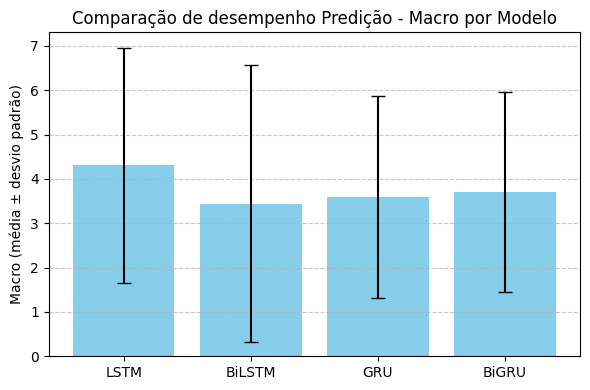

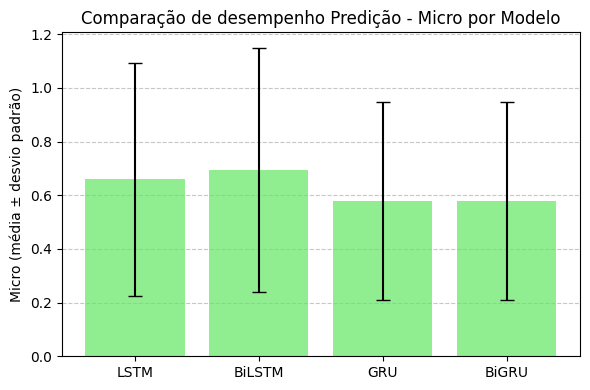

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# === Dados dos resultados dos modelos ===
data = {
    "Modelo": ["LSTM", "BiLSTM", "GRU", "BiGRU"],
    "Macro_Mean": [4.306456, 3.445265, 3.594490, 3.709802],
    "Macro_STD": [2.653264, 3.120069, 2.286521, 2.260718],
    "Micro_Mean": [0.659541, 0.694438, 0.579811, 0.579379],
    "Micro_STD": [0.433804, 0.455345, 0.369050, 0.368945],
}

# Criar DataFrame
df = pd.DataFrame(data)
display(df)

# === Gráfico 1: Macro ===
plt.figure(figsize=(6,4))
plt.bar(df["Modelo"], df["Macro_Mean"], yerr=df["Macro_STD"], capsize=5, color='skyblue')
plt.ylabel("Macro (média ± desvio padrão)")
plt.title("Comparação de desempenho Predição - Macro por Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Gráfico 2: Micro ===
plt.figure(figsize=(6,4))
plt.bar(df["Modelo"], df["Micro_Mean"], yerr=df["Micro_STD"], capsize=5, color='lightgreen')
plt.ylabel("Micro (média ± desvio padrão)")
plt.title("Comparação de desempenho Predição - Micro por Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Gráfico comparativo Reconstrução

,Modelo,Macro_Mean,Macro_STD,Micro_Mean,Micro_STD
0,LSTM,2.207989,1.113881,0.635714,0.048011
1,BiLSTM,3.247876,2.684664,0.146874,0.040951
2,GRU,1.139370,0.281916,0.685234,0.057076
3,BiGRU,0.438982,0.257498,0.126842,0.058896


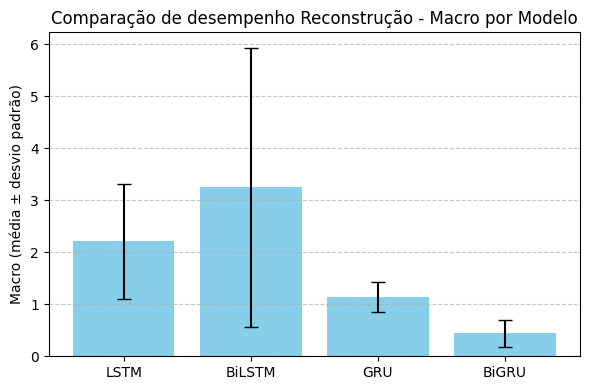

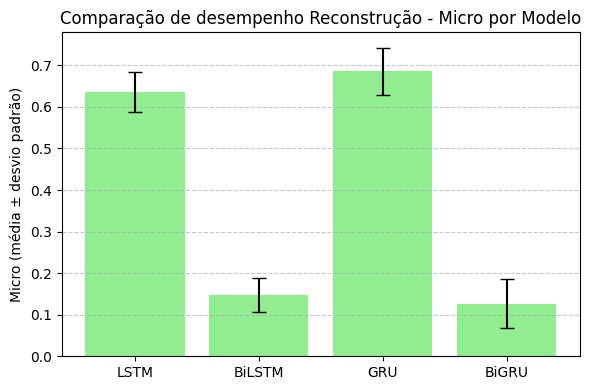

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# === Dados dos resultados dos modelos ===
data = {
    "Modelo": ["LSTM", "BiLSTM", "GRU", "BiGRU"],
    "Macro_Mean": [2.207989, 3.247876, 1.139370, 0.438982],
    "Macro_STD": [1.113881, 2.684664, 0.281916, 0.257498],
    "Micro_Mean": [0.635714, 0.146874, 0.685234, 0.126842],
    "Micro_STD": [0.048011, 0.040951, 0.057076, 0.058896],
}

# Criar DataFrame
df = pd.DataFrame(data)
display(df)

# === Gráfico 1: Macro ===
plt.figure(figsize=(6,4))
plt.bar(df["Modelo"], df["Macro_Mean"], yerr=df["Macro_STD"], capsize=5, color='skyblue')
plt.ylabel("Macro (média ± desvio padrão)")
plt.title("Comparação de desempenho Reconstrução - Macro por Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Gráfico 2: Micro ===
plt.figure(figsize=(6,4))
plt.bar(df["Modelo"], df["Micro_Mean"], yerr=df["Micro_STD"], capsize=5, color='lightgreen')
plt.ylabel("Micro (média ± desvio padrão)")
plt.title("Comparação de desempenho Reconstrução - Micro por Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Gráfico comparativo Predição x Reconstrução

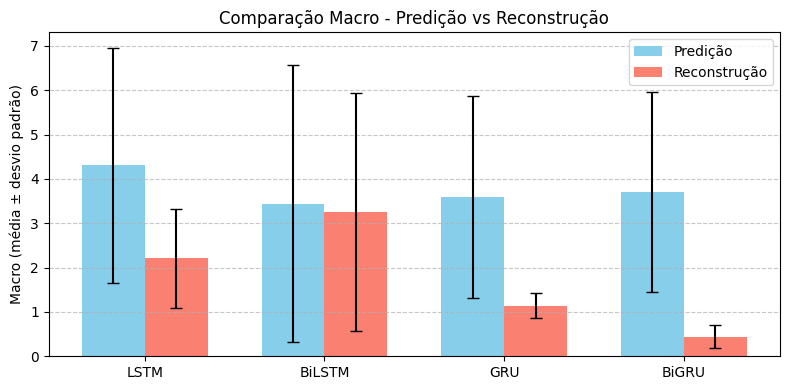

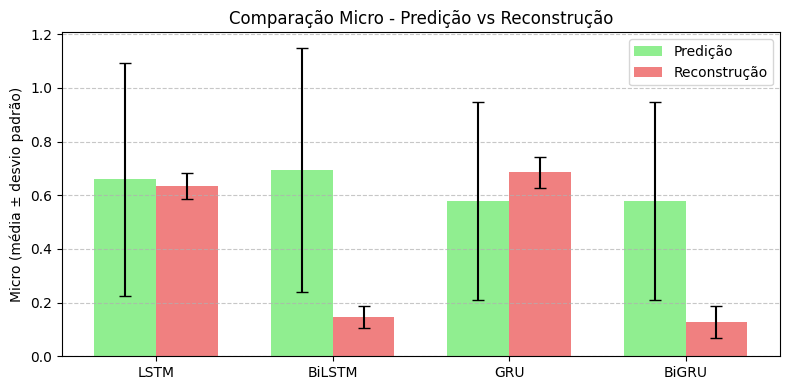

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Dados de predição ===
data_pred = {
    "Modelo": ["LSTM", "BiLSTM", "GRU", "BiGRU"],
    "Macro_Mean": [4.306456, 3.445265, 3.594490, 3.709802],
    "Macro_STD": [2.653264, 3.120069, 2.286521, 2.260718],
    "Micro_Mean": [0.659541, 0.694438, 0.579811, 0.579379],
    "Micro_STD": [0.433804, 0.455345, 0.369050, 0.368945],
}

# === Dados de reconstrução ===
data_rec = {
    "Modelo": ["LSTM", "BiLSTM", "GRU", "BiGRU"],
    "Macro_Mean": [2.207989, 3.247876, 1.139370, 0.438982],
    "Macro_STD": [1.113881, 2.684664, 0.281916, 0.257498],
    "Micro_Mean": [0.635714, 0.146874, 0.685234, 0.126842],
    "Micro_STD": [0.048011, 0.040951, 0.057076, 0.058896],
}

# Criar DataFrames
df_pred = pd.DataFrame(data_pred)
df_rec = pd.DataFrame(data_rec)

# === Gráficos lado a lado ===
x = np.arange(len(df_pred["Modelo"]))  # posição no eixo x
width = 0.35  # largura das barras

# ======== MACRO ========
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x - width/2, df_pred["Macro_Mean"], width, yerr=df_pred["Macro_STD"], 
       label="Predição", color='skyblue', capsize=4)
ax.bar(x + width/2, df_rec["Macro_Mean"], width, yerr=df_rec["Macro_STD"], 
       label="Reconstrução", color='salmon', capsize=4)

ax.set_ylabel("Macro (média ± desvio padrão)")
ax.set_title("Comparação Macro - Predição vs Reconstrução")
ax.set_xticks(x)
ax.set_xticklabels(df_pred["Modelo"])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ======== MICRO ========
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x - width/2, df_pred["Micro_Mean"], width, yerr=df_pred["Micro_STD"], 
       label="Predição", color='lightgreen', capsize=4)
ax.bar(x + width/2, df_rec["Micro_Mean"], width, yerr=df_rec["Micro_STD"], 
       label="Reconstrução", color='lightcoral', capsize=4)

ax.set_ylabel("Micro (média ± desvio padrão)")
ax.set_title("Comparação Micro - Predição vs Reconstrução")
ax.set_xticks(x)
ax.set_xticklabels(df_pred["Modelo"])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Evolução LOSS - treino e teste todos modelos Predição

,epoch,train_L1,train_L4,test_macro_mean,test_macro_std,test_micro_mean,test_micro_std,model
0,1,43.359948,0.718725,15.285093,9.093259,1.154955,0.596296,LSTM
1,2,48.408371,0.687479,15.022362,8.879761,1.151616,0.593683,LSTM
2,3,43.394470,0.625849,14.390828,8.361010,1.146791,0.588067,LSTM
3,4,41.115706,0.545885,12.919677,7.166314,1.149088,0.574213,LSTM
4,5,38.687097,0.440278,10.216966,5.060891,1.249164,0.539247,LSTM


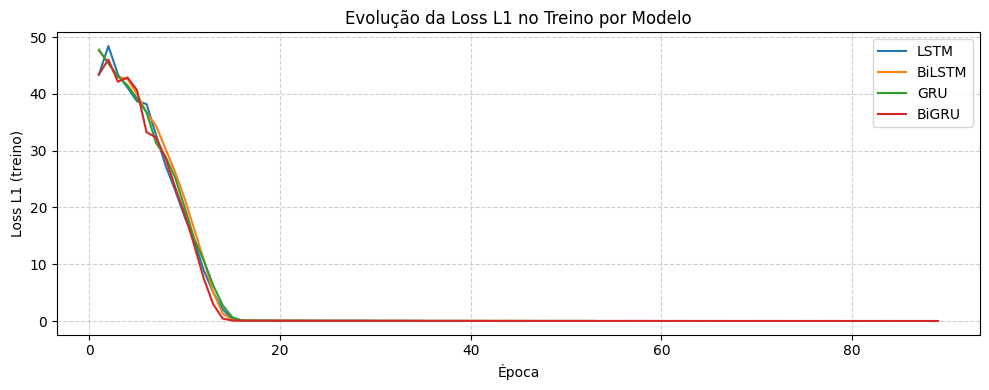

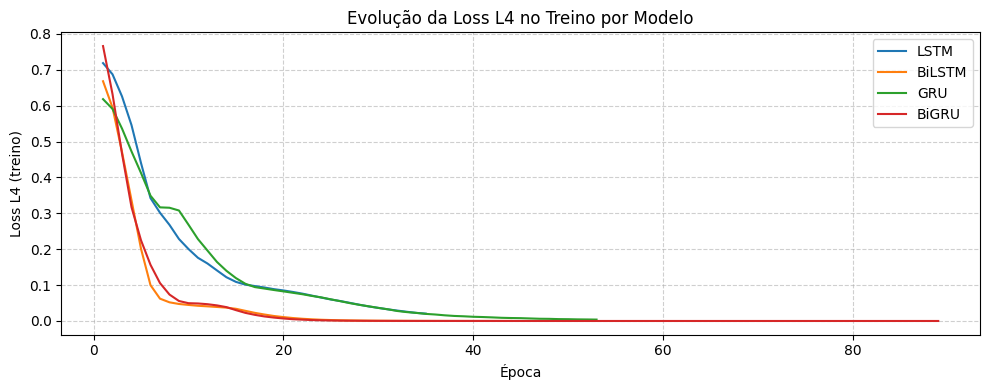

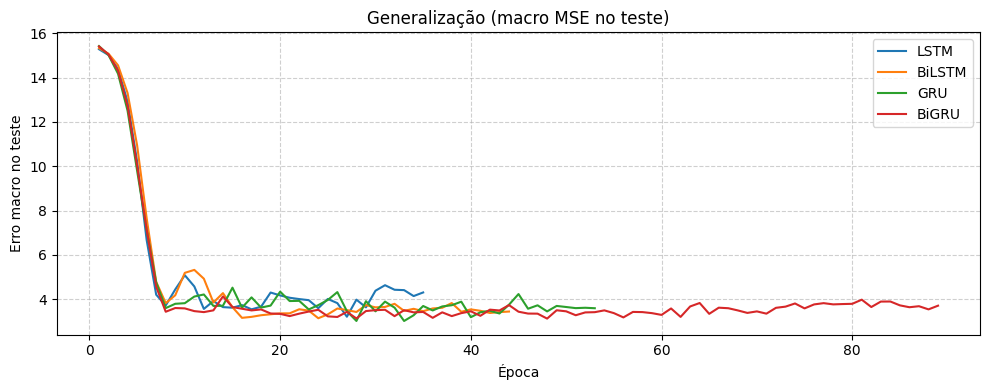

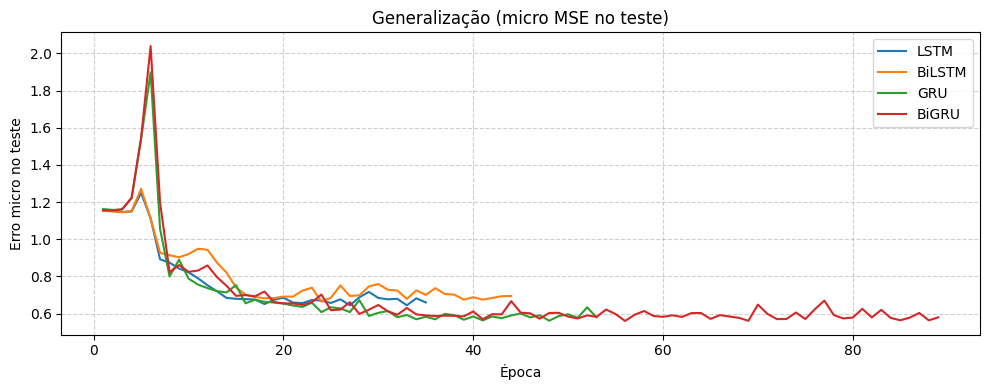

In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Mapeia nome do modelo -> caminho do JSON correspondente
# ---------------------------------------------------------
model_files = {
    "LSTM": "/home/ferna/cognite/rnn_train_lstm_predict.json",
    "BiLSTM": "/home/ferna/cognite/rnn_train_bilstm_predict.json",
    "GRU": "/home/ferna/cognite/rnn_train_gru_predict.json",
    "BiGRU": "/home/ferna/cognite/rnn_train_bigru_predict.json",
}

# ---------------------------------------------------------
# 2. Função utilitária: carrega um json e vira DataFrame
#    garantindo que tem 'epoch' e as losses de treino
# ---------------------------------------------------------
def load_training_df(json_path, model_name):
    with open(json_path, "r") as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Garantir que existe coluna epoch ordenada
    if "epoch" not in df.columns:
        df["epoch"] = range(1, len(df) + 1)
    df = df.sort_values("epoch").reset_index(drop=True)

    # Anexa o nome do modelo pra poder plotar depois
    df["model"] = model_name

    return df

# Carrega todos os modelos em uma lista e concatena
dfs = []
for model_name, path in model_files.items():
    try:
        df_model = load_training_df(path, model_name)
        dfs.append(df_model)
    except FileNotFoundError:
        print(f"Aviso: arquivo '{path}' não encontrado, ignorando {model_name}")

all_df = pd.concat(dfs, ignore_index=True)

display(all_df.head())

# ---------------------------------------------------------
# 3. Função auxiliar pra plotar uma métrica de treino
#    para todos os modelos no mesmo gráfico
# ---------------------------------------------------------
def plot_training_metric(df, metric_col, ylabel=None, title=None):
    plt.figure(figsize=(10,4))

    for model_name in df["model"].unique():
        sub = df[df["model"] == model_name]

        # Só plota se essa métrica existir nesse modelo
        if metric_col in sub.columns:
            plt.plot(
                sub["epoch"],
                sub[metric_col],
                label=model_name
            )

    plt.xlabel("Época")
    plt.ylabel(ylabel if ylabel else metric_col)
    plt.title(title if title else metric_col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 4. Plotar curvas de erro de treinamento
#    - train_L1: geralmente a loss principal de reconstrução/erro absoluto
#    - train_L4: termo extra (por ex. penalização de outliers, smoothness etc.)
# ---------------------------------------------------------

plot_training_metric(
    all_df,
    metric_col="train_L1",
    ylabel="Loss L1 (treino)",
    title="Evolução da Loss L1 no Treino por Modelo"
)


plot_training_metric(
    all_df,
    metric_col="train_L4",
    ylabel="Loss L4 (treino)",
    title="Evolução da Loss L4 no Treino por Modelo"
)

# ---------------------------------------------------------
# 5. Plotar erro no teste pra comparar generalização

# ---------------------------------------------------------

plot_training_metric(
    all_df,
    metric_col="test_macro_mean",
    ylabel="Erro macro no teste",
    title="Generalização (macro MSE no teste)"
)

plot_training_metric(
    all_df,
    metric_col="test_micro_mean",
    ylabel="Erro micro no teste",
    title="Generalização (micro MSE no teste)"
)




# Evolução LOSS - treino e teste todos modelos Reconstrução

,epoch,train_L1,train_L2,train_L4,test_macro_mean,test_macro_std,test_micro_mean,test_micro_std,test_noise_macro_mean,test_noise_macro_std,test_noise_micro_mean,test_noise_micro_std,model
0,1,6.002842,0.0,0.871760,211.213342,209.427915,1.385867,0.618954,0.0,0.0,0.0,0.0,LSTM
1,2,5.361456,0.0,0.849520,128.026016,126.043708,1.399708,0.551651,0.0,0.0,0.0,0.0,LSTM
2,3,4.602846,0.0,0.797250,196.714677,194.618319,1.384842,0.622822,0.0,0.0,0.0,0.0,LSTM
3,4,3.477768,0.0,0.722822,161.912912,160.088268,1.204086,0.484246,0.0,0.0,0.0,0.0,LSTM
4,5,2.677666,0.0,0.601288,143.810549,141.925629,1.440439,0.526483,0.0,0.0,0.0,0.0,LSTM


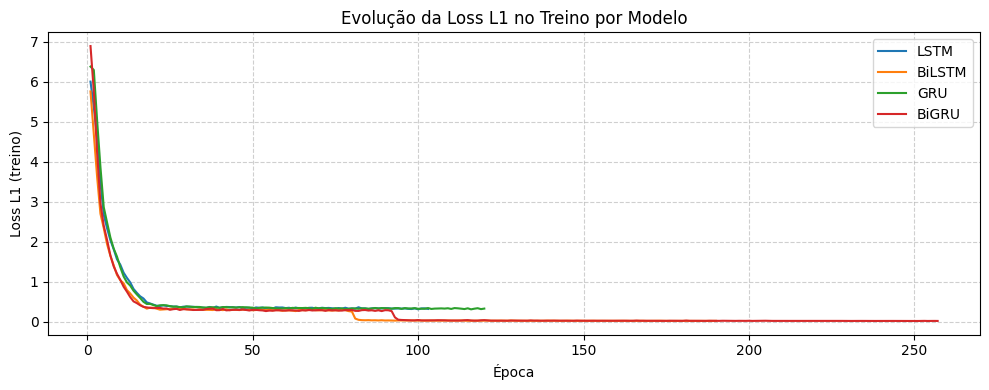

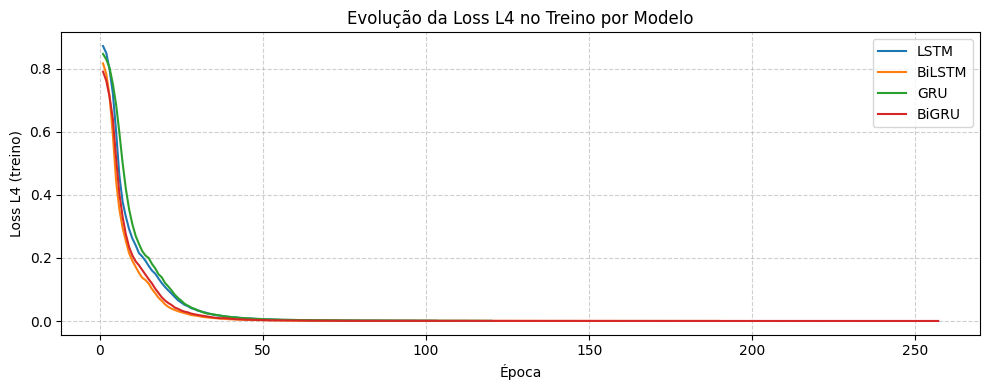

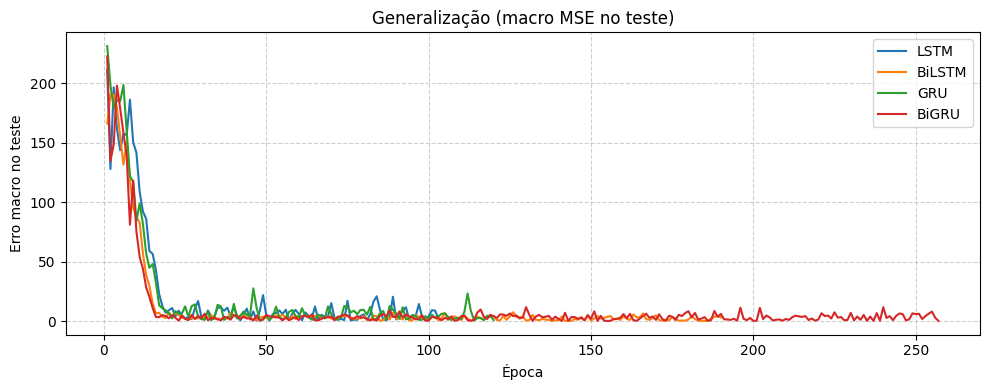

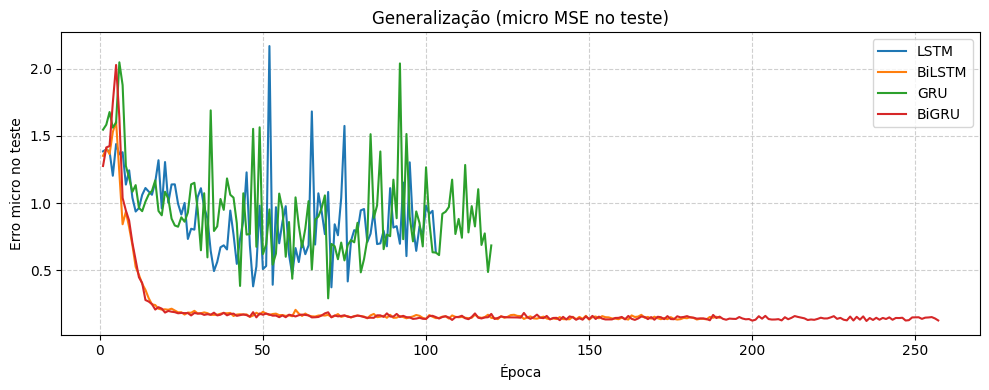

In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Mapeia nome do modelo -> caminho do JSON correspondente
# ---------------------------------------------------------
model_files = {
    "LSTM": "/home/ferna/cognite/rnn_train_lstm_rebuild.json",
    "BiLSTM": "/home/ferna/cognite/rnn_train_bilstm_rebuild.json",
    "GRU": "/home/ferna/cognite/rnn_train_gru_rebuild.json",
    "BiGRU": "/home/ferna/cognite/rnn_train_bigru_rebuild.json",
}

# ---------------------------------------------------------
# 2. Função utilitária: carrega um json e vira DataFrame
#    garantindo que tem 'epoch' e as losses de treino
# ---------------------------------------------------------
def load_training_df(json_path, model_name):
    with open(json_path, "r") as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Garantir que existe coluna epoch ordenada
    if "epoch" not in df.columns:
        df["epoch"] = range(1, len(df) + 1)
    df = df.sort_values("epoch").reset_index(drop=True)

    # Anexa o nome do modelo pra poder plotar depois
    df["model"] = model_name

    return df

# Carrega todos os modelos em uma lista e concatena
dfs = []
for model_name, path in model_files.items():
    try:
        df_model = load_training_df(path, model_name)
        dfs.append(df_model)
    except FileNotFoundError:
        print(f"Aviso: arquivo '{path}' não encontrado, ignorando {model_name}")

all_df = pd.concat(dfs, ignore_index=True)

display(all_df.head())

# ---------------------------------------------------------
# 3. Função auxiliar pra plotar uma métrica de treino
#    para todos os modelos no mesmo gráfico
# ---------------------------------------------------------
def plot_training_metric(df, metric_col, ylabel=None, title=None):
    plt.figure(figsize=(10,4))

    for model_name in df["model"].unique():
        sub = df[df["model"] == model_name]

        # Só plota se essa métrica existir nesse modelo
        if metric_col in sub.columns:
            plt.plot(
                sub["epoch"],
                sub[metric_col],
                label=model_name
            )

    plt.xlabel("Época")
    plt.ylabel(ylabel if ylabel else metric_col)
    plt.title(title if title else metric_col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 4. Plotar curvas de erro de treinamento
#    - train_L1: geralmente a loss principal de reconstrução/erro absoluto
#    - train_L4: termo extra (por ex. penalização de outliers, smoothness etc.)
# ---------------------------------------------------------

plot_training_metric(
    all_df,
    metric_col="train_L1",
    ylabel="Loss L1 (treino)",
    title="Evolução da Loss L1 no Treino por Modelo"
)


plot_training_metric(
    all_df,
    metric_col="train_L4",
    ylabel="Loss L4 (treino)",
    title="Evolução da Loss L4 no Treino por Modelo"
)

# ---------------------------------------------------------
# 5. Plotar erro no teste pra comparar generalização

# ---------------------------------------------------------

plot_training_metric(
    all_df,
    metric_col="test_macro_mean",
    ylabel="Erro macro no teste",
    title="Generalização (macro MSE no teste)"
)

plot_training_metric(
    all_df,
    metric_col="test_micro_mean",
    ylabel="Erro micro no teste",
    title="Generalização (micro MSE no teste)"
)




# Evolução da LOSS - treino e teste PREDIÇÃO


=== Modelo: LSTM ===


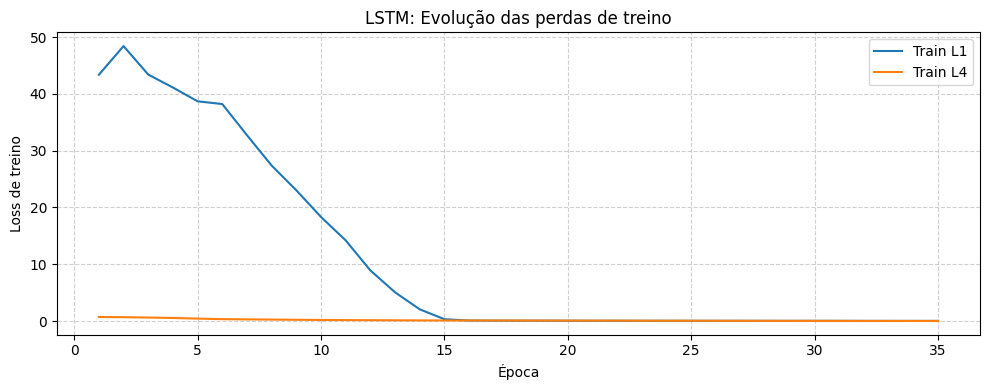

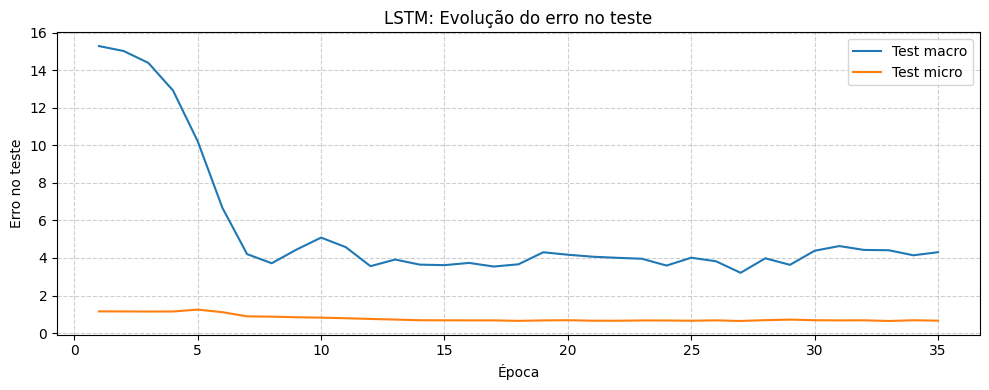


=== Modelo: BiLSTM ===


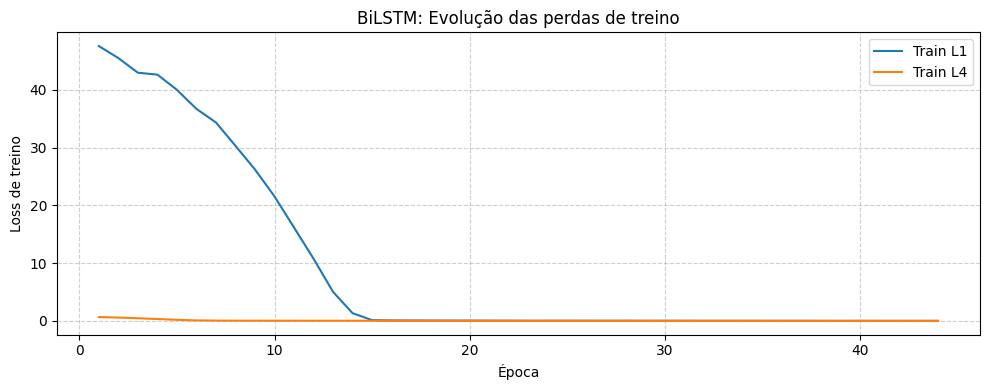

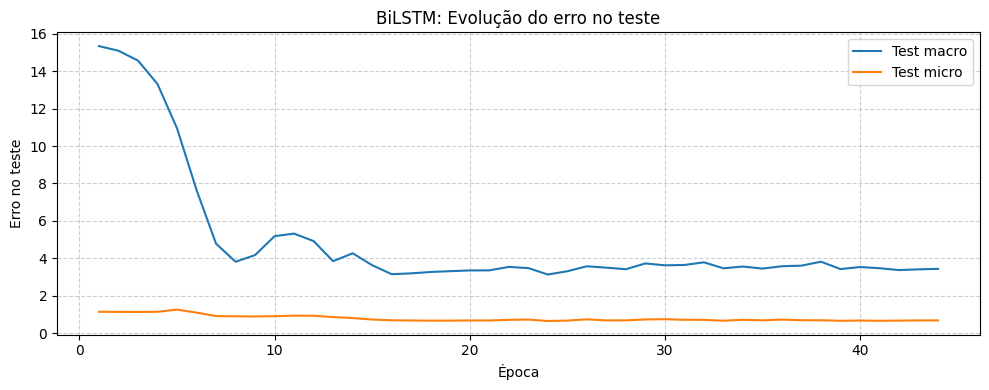


=== Modelo: GRU ===


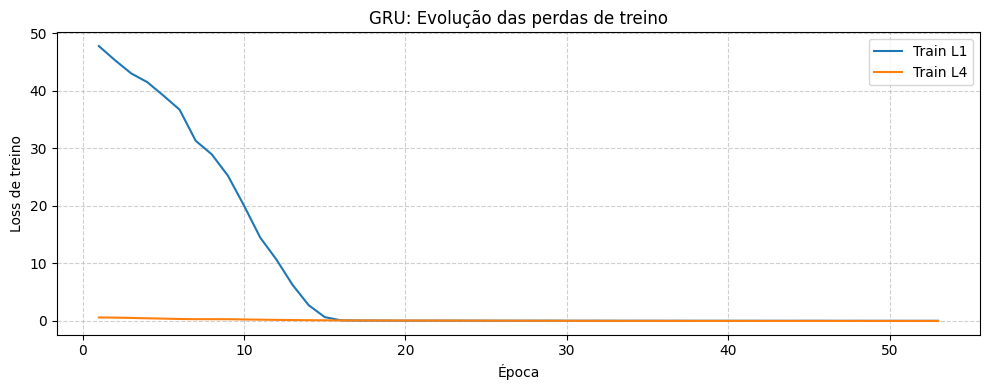

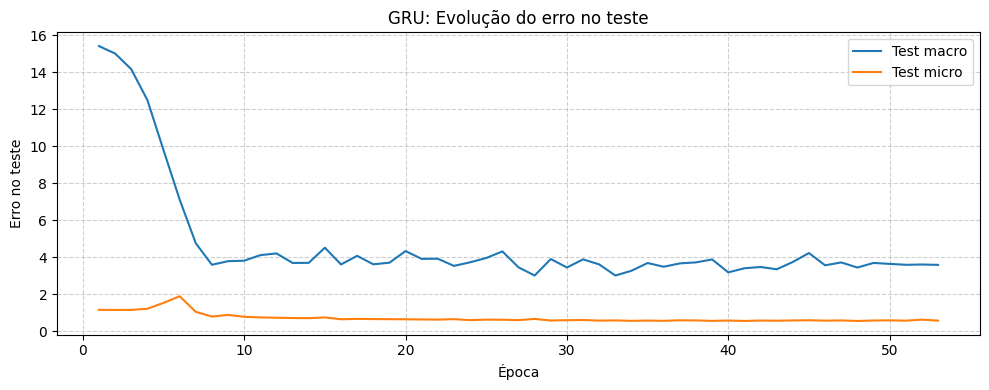


=== Modelo: BiGRU ===


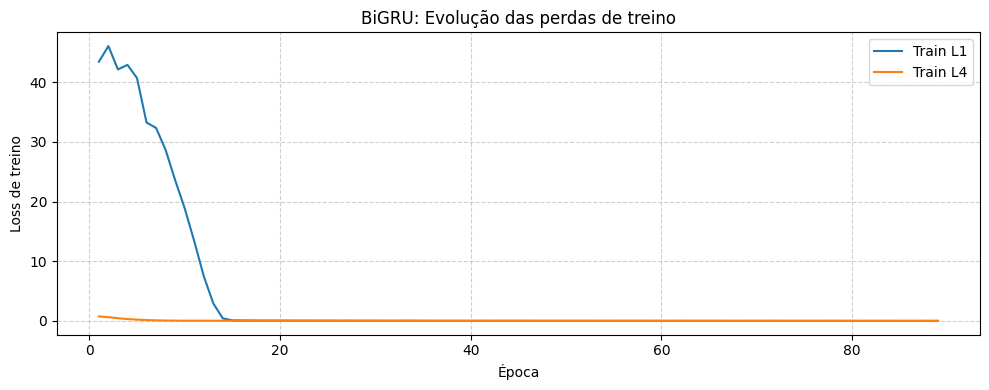

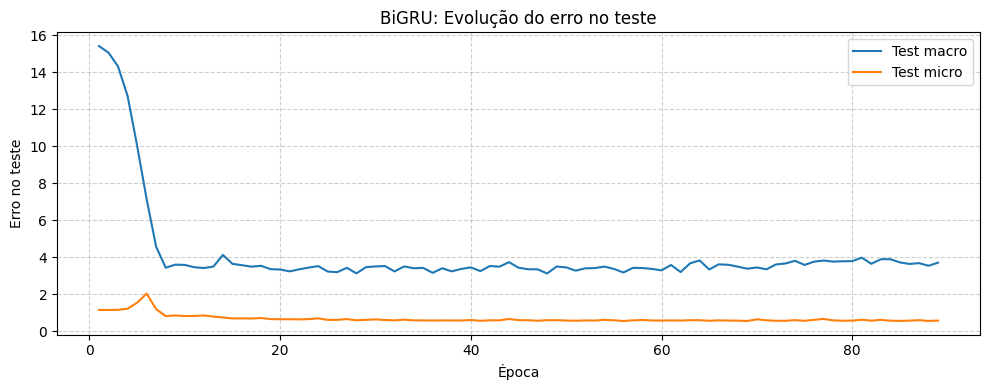

In [34]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 1. Lista de arquivos de modelos
# ===========================

model_files = {
    "LSTM": "/home/ferna/cognite/rnn_train_lstm_predict.json",
    "BiLSTM": "/home/ferna/cognite/rnn_train_bilstm_predict.json",
    "GRU": "/home/ferna/cognite/rnn_train_gru_predict.json",
    "BiGRU": "/home/ferna/cognite/rnn_train_bigru_predict.json",
}

# ===========================
# 2. Função para carregar e plotar os gráficos de um modelo
# ===========================
def plot_model_results(model_name, json_path):
    print(f"\n=== Modelo: {model_name} ===")
    if not os.path.exists(json_path):
        print(f"Arquivo não encontrado: {json_path}")
        return

    # ---- Carregar JSON ----
    with open(json_path, "r") as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    if "epoch" not in df.columns:
        df["epoch"] = range(1, len(df) + 1)
    df = df.sort_values("epoch").reset_index(drop=True)

    # ---- Gráfico 1: perdas de treino ----
    plt.figure(figsize=(10, 4))
    if "train_L1" in df.columns:
        plt.plot(df["epoch"], df["train_L1"], label="Train L1")
    if "train_L4" in df.columns:
        plt.plot(df["epoch"], df["train_L4"], label="Train L4")
    plt.xlabel("Época")
    plt.ylabel("Loss de treino")
    plt.title(f"{model_name}: Evolução das perdas de treino")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- Gráfico 2: erro no teste ----
    plt.figure(figsize=(10, 4))
    if "test_macro_mean" in df.columns:
        plt.plot(df["epoch"], df["test_macro_mean"], label="Test macro")
    elif "macro_mse" in df.columns:
        plt.plot(df["epoch"], df["macro_mse"], label="Test macro_mse")

    if "test_micro_mean" in df.columns:
        plt.plot(df["epoch"], df["test_micro_mean"], label="Test micro")
    elif "micro_mse" in df.columns:
        plt.plot(df["epoch"], df["micro_mse"], label="Test micro_mse")
    plt.xlabel("Época")
    plt.ylabel("Erro no teste")
    plt.title(f"{model_name}: Evolução do erro no teste")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ===========================
# 3. Loop: gerar gráficos de todos os modelos
# ===========================
for model_name, path in model_files.items():
    plot_model_results(model_name, path)


# Evolução da LOSS - treino e teste RECONSTRUÇÃO


=== Modelo: LSTM ===


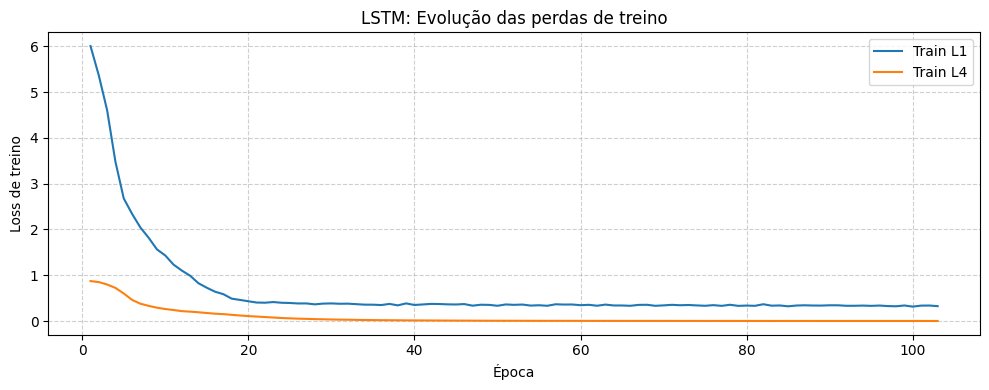

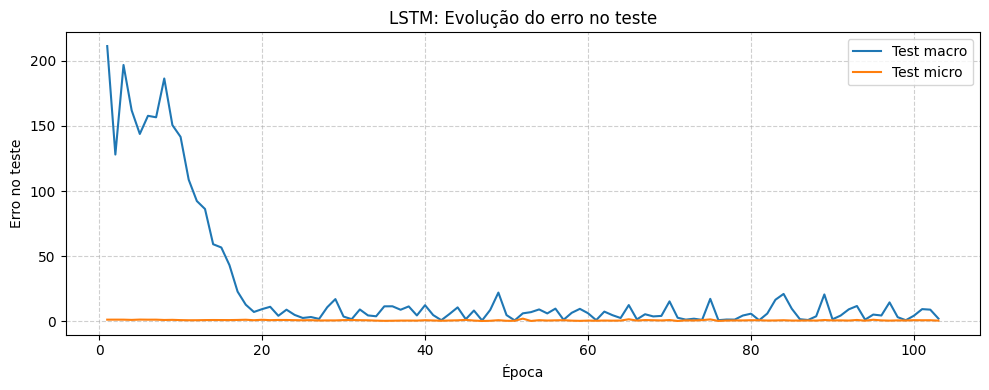


=== Modelo: BiLSTM ===


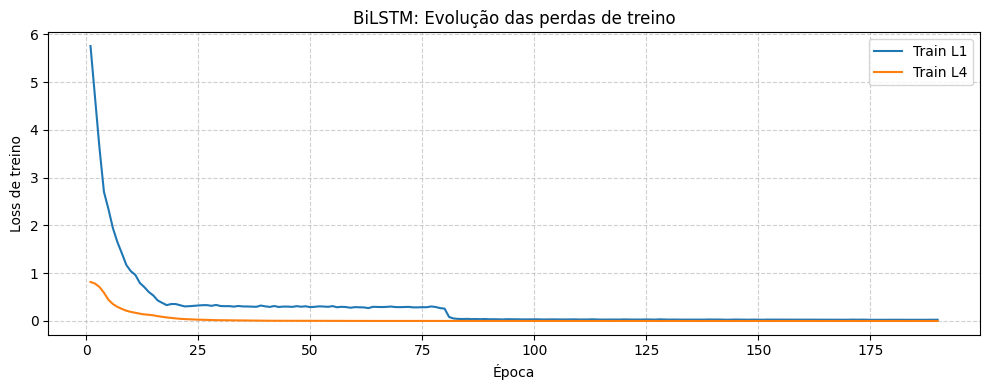

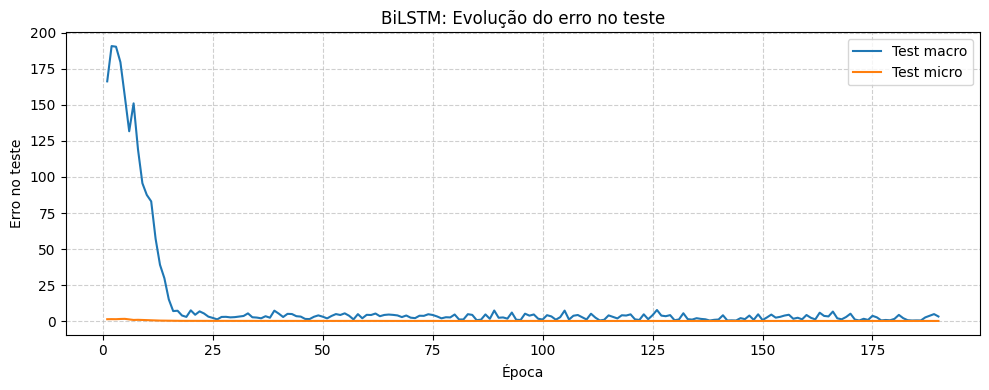


=== Modelo: GRU ===


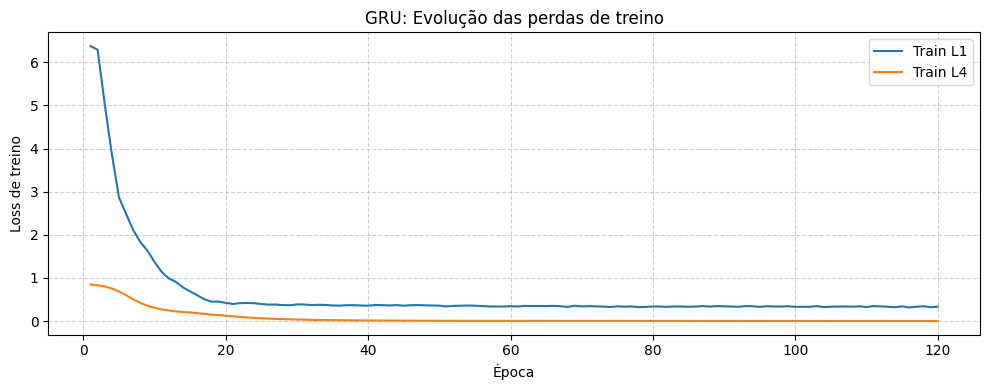

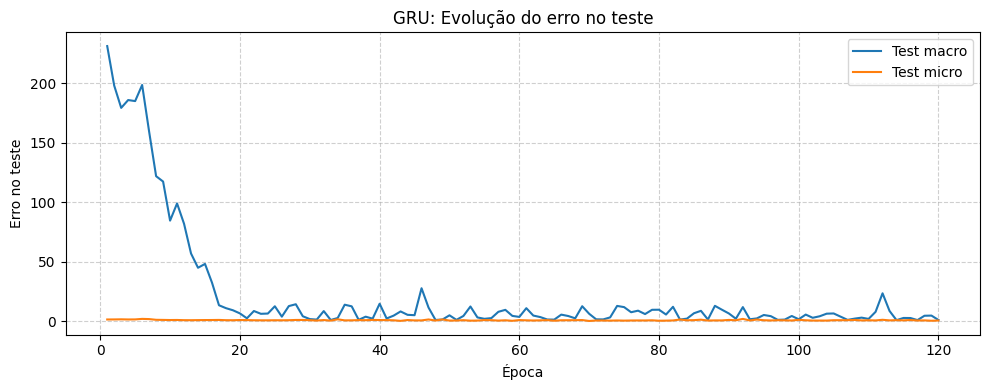


=== Modelo: BiGRU ===


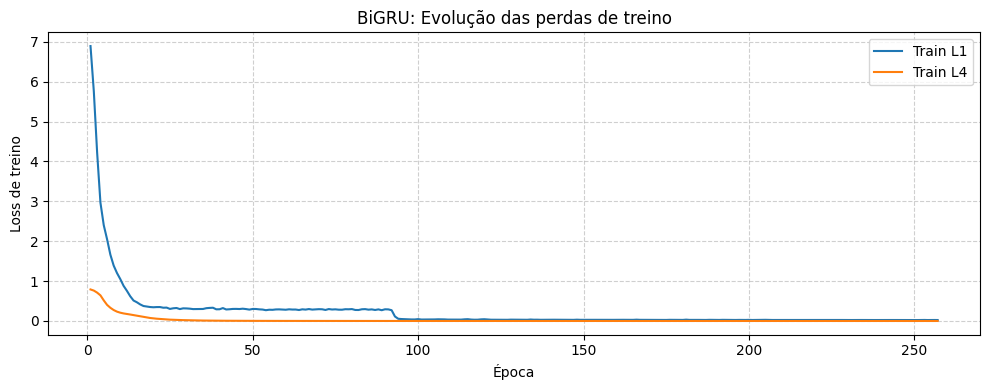

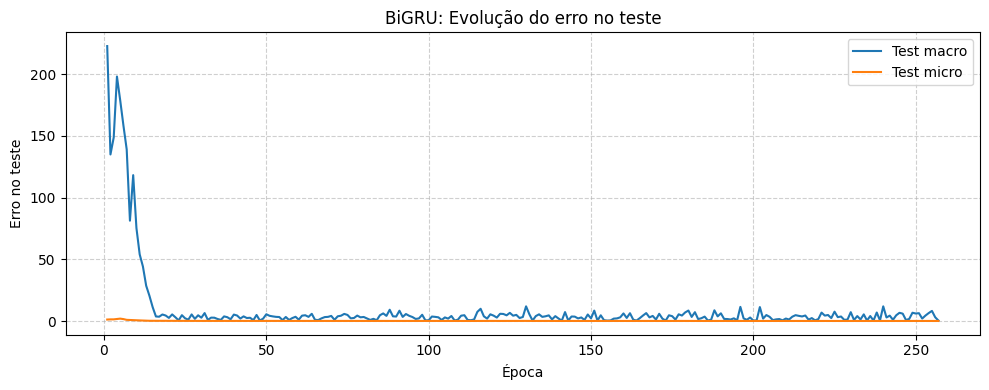

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

# ===========================
# 1. Lista de arquivos de modelos
# ===========================

model_files = {
    "LSTM": "/home/ferna/cognite/rnn_train_lstm_rebuild.json",
    "BiLSTM": "/home/ferna/cognite/rnn_train_bilstm_rebuild.json",
    "GRU": "/home/ferna/cognite/rnn_train_gru_rebuild.json",
    "BiGRU": "/home/ferna/cognite/rnn_train_bigru_rebuild.json",
}

# ===========================
# 2. Função para carregar e plotar os gráficos de um modelo
# ===========================
def plot_model_results(model_name, json_path):
    print(f"\n=== Modelo: {model_name} ===")
    if not os.path.exists(json_path):
        print(f"Arquivo não encontrado: {json_path}")
        return

    # ---- Carregar JSON ----
    with open(json_path, "r") as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    if "epoch" not in df.columns:
        df["epoch"] = range(1, len(df) + 1)
    df = df.sort_values("epoch").reset_index(drop=True)

    # ---- Gráfico 1: perdas de treino ----
    plt.figure(figsize=(10, 4))
    if "train_L1" in df.columns:
        plt.plot(df["epoch"], df["train_L1"], label="Train L1")
    if "train_L4" in df.columns:
        plt.plot(df["epoch"], df["train_L4"], label="Train L4")
    plt.xlabel("Época")
    plt.ylabel("Loss de treino")
    plt.title(f"{model_name}: Evolução das perdas de treino")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- Gráfico 2: erro no teste ----
    plt.figure(figsize=(10, 4))
    if "test_macro_mean" in df.columns:
        plt.plot(df["epoch"], df["test_macro_mean"], label="Test macro")
    elif "macro_mse" in df.columns:
        plt.plot(df["epoch"], df["macro_mse"], label="Test macro_mse")

    if "test_micro_mean" in df.columns:
        plt.plot(df["epoch"], df["test_micro_mean"], label="Test micro")
    elif "micro_mse" in df.columns:
        plt.plot(df["epoch"], df["micro_mse"], label="Test micro_mse")
    plt.xlabel("Época")
    plt.ylabel("Erro no teste")
    plt.title(f"{model_name}: Evolução do erro no teste")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ===========================
# 3. Loop: gerar gráficos de todos os modelos
# ===========================
for model_name, path in model_files.items():
    plot_model_results(model_name, path)
